In [3]:
import tensorflow as tf
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()
x_train.shape

(60000, 28, 28)

<ipython-input-4-761675798858>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


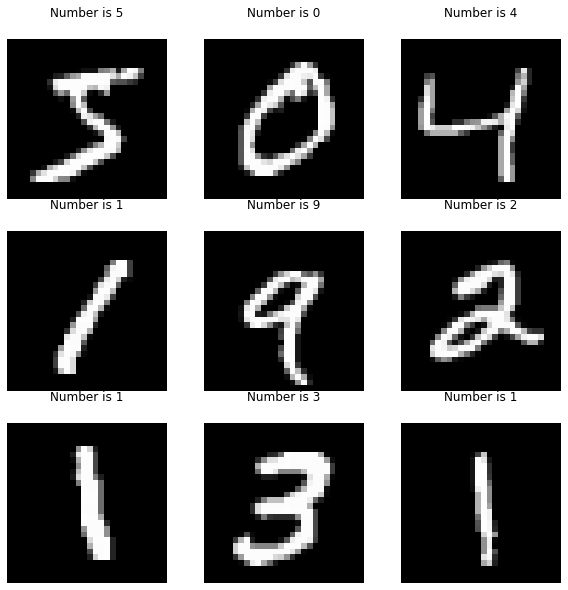

In [4]:
import matplotlib.pyplot as plt
fig,axs=plt.subplots(3,3,figsize=(10,10))
plt.gray()
for i,ax in enumerate(axs.flat):
    ax.matshow(x_train[i])
    ax.axis('off')
    ax.set_title('Number is {}'.format(y_train[i]))
fig.show()

Number is: 5


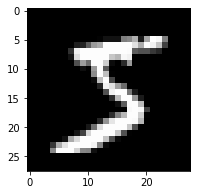

Number is: 0


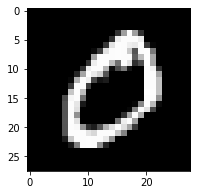

Number is: 4


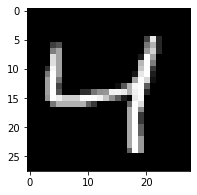

Number is: 1


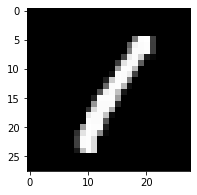

In [8]:
for i in range(0,4):
    plt.figure(figsize=(3,3))
    plt.imshow(x_train[i])
    print("Number is:",y_train[i])
    plt.show()

In [9]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
input_shape=(28,28,1)
print(x_train.ndim)

4


In [10]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255
print('x_train shape:',x_train.shape)
print('Number of images in x_train:',x_train.shape[0])
print('Number of images in x_test:',x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train: 60000
Number of images in x_test: 10000


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D

model=Sequential()
model.add(Conv2D(28,kernel_size=(3,3),input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [15]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x=x_train,y=y_train,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2101 - accuracy: 0.9358
Epoch 2/3
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0861 - accuracy: 0.9734
Epoch 3/3
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0594 - accuracy: 0.9820


In [16]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0593 - accuracy: 0.9816


[0.05930916592478752, 0.9815999865531921]

In [17]:
p=model.predict(x_test)

In [18]:
print(p[0])

[1.1832909e-08 7.3867885e-09 1.4464398e-06 1.1087690e-06 8.6903396e-10
 1.4819862e-09 1.0789681e-11 9.9999714e-01 9.2804076e-09 3.2231404e-07]
